# Sampling in Python

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# Import datasets (pyarrow is required to work with the feather format)
coffee_ratings = pd.read_feather("datasets/coffee_ratings_full.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
attrition_pop = pd.read_feather("datasets/attrition.feather")

## 1. Introduction to Sampling

**Sampling: Overview and Importance**

1. **What is Sampling?**
   - **Definition**: Sampling is the process of selecting a subset of individuals or observations from a   
   larger population to estimate characteristics of the whole population.
   - **Purpose**: It allows researchers to draw conclusions about a population without needing to survey   
   every member, saving time and resources.

2. **Why is Sampling Powerful?**
   - **Efficiency**: Sampling is more practical and cost-effective than a full population study.
   - **Accuracy**: With proper sampling techniques, the subset can accurately reflect the population's   
   characteristics.
   - **Feasibility**: It makes large-scale studies possible, which would otherwise be impractical.

3. **Problems with Convenience Sampling**
   - **Definition**: Convenience sampling involves selecting a sample that is easy to access or contact.
   - **Issues**:
     - **Bias**: The sample may not be representative of the population, leading to skewed results.
     - **Lack of Generalizability**: Findings from a convenience sample may not be applicable to the broader   
     population.

4. **True Randomness vs. Pseudo-Randomness**
   - **True Randomness**: Every member of the population has an equal chance of being selected. This method   
   is unbiased and ensures representativeness.
   - **Pseudo-Randomness**: Often generated by algorithms, it may not perfectly mimic true randomness. While   
   useful, it can introduce slight biases if not properly implemented.

In [3]:
# Subset coffee_ratings for columns of interest
coffee_ratings = coffee_ratings[["total_cup_points", "variety", "country_of_origin",
                                 "aroma", "flavor", "aftertaste", "body", "balance"]]

# Preview DataFrame
coffee_ratings.head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


In [4]:
# Preview song data from Spotify
spotify_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

### Sampling and point estimates

#### _Simple sampling with pandas_

In [5]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

print(spotify_sample.head())

       acousticness                            artists  danceability  \
33636        0.5300                 ['The Black Keys']         0.432   
15633        0.4060    ['Los Herederos De Nuevo León']         0.915   
26212        0.0367              ['Sublime With Rome']         0.677   
12675        0.3810  ['Jason Boland & The Stragglers']         0.686   
25313        0.1410                  ['Box Car Racer']         0.623   

       duration_ms  duration_minutes  energy  explicit  \
33636     128893.0          2.148217   0.617       0.0   
15633     171227.0          2.853783   0.714       0.0   
26212     232813.0          3.880217   0.716       0.0   
12675     266133.0          4.435550   0.508       0.0   
25313     196600.0          3.276667   0.853       0.0   

                           id  instrumentalness  key  liveness  loudness  \
33636  5BvuyYHjA98IxU0nQUGzZr           0.00553  0.0    0.1220    -3.125   
15633  5F8bMcDOddAKUYnoqhKpRf           0.00000  2.0    0.0674    

In [6]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

print(f"mean_dur_pop: {mean_dur_pop}, mean_dur_samp: {mean_dur_samp}")

mean_dur_pop: 3.8521519140900073, mean_dur_samp: 3.8484709833333337


#### _Simple sampling and calculation with NumPy_

The mean song duration in the sample is similar, but not identical to the mean song duration in the  
whole population.

In [7]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

print(loudness_samp.head())

12033    -3.472
30696   -13.046
22208    -3.208
39710   -10.803
9966     -5.925
Name: loudness, dtype: float64


In [8]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(f"mean_loudness_pop: {mean_loudness_pop}, mean_loudness_samp: {mean_loudness_samp}")

mean_loudness_pop: -7.366856851353947, mean_loudness_samp: -7.36487


### Convenience sampling

#### _Are findings from the sample generalizable?_

Visualizing the distributions of the population and the sample can help determine whether or not the  
sample is representative of the population.

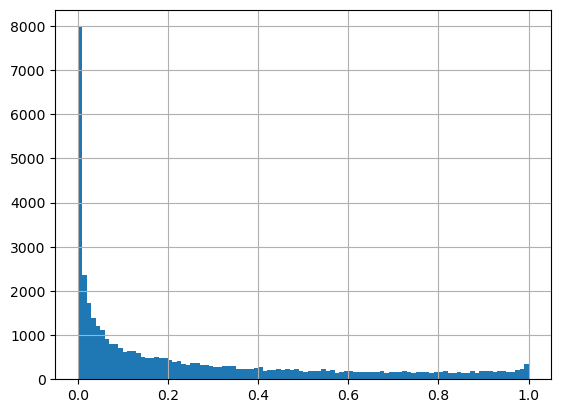

In [9]:
''' The "acousticness" column, is a confidence measure from zero to one of whether the track was  
made with instruments that aren't plugged in. '''

# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

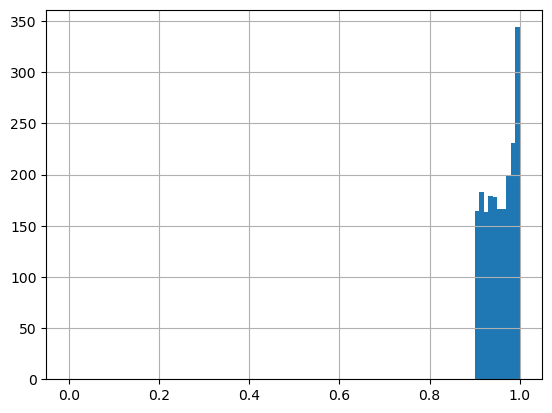

In [10]:
# For illustration, create a convenience sample where "acousticness" is above 0.9
spotify_acousticness_sample = spotify_population[spotify_population["acousticness"] > 0.9]

# Visualize the sample distribution of "acousticness"
spotify_acousticness_sample["acousticness"].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

The `acousticness` values in the sample are not generalizable to the general population as the sample  
values are consistently higher than those in the general population.

#### _Are these findings generalizable?_

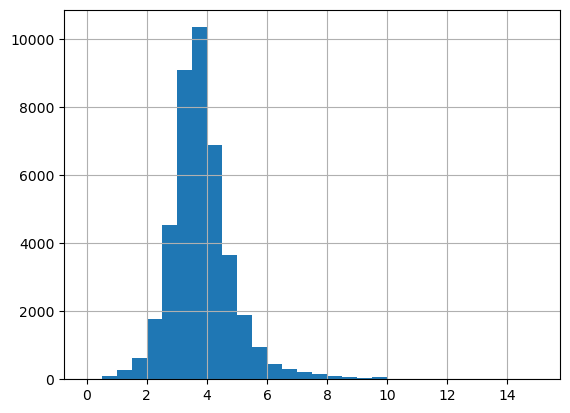

In [11]:
# Visualize the distribution of "duration_minutes" as a histogram
spotify_population["duration_minutes"].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

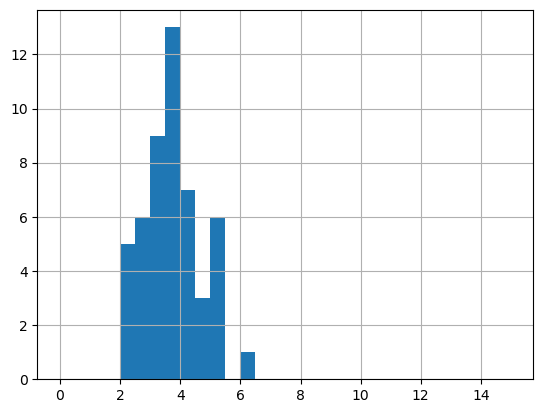

In [12]:
# Create a random sample of "spotify_population"
spotify_duration_sample = spotify_population.sample(n=50)

# Visualize the sample distribution of "duration_minutes"
spotify_duration_sample["duration_minutes"].hist(bins=np.arange(0, 15.05, 0.5))
plt.show()

The duration values in the sample are generalizable to the general population as a random sample of all  
songs in the population was used.

### Pseudo-random number generation

#### _Generating random numbers_

`.sample()` was used to generate pseudo-random numbers from a set of values in a DataFrame. A related  
task is to generate random numbers that follow a statistical distribution, like the uniform distribution  
or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying  
the number of random numbers to generate.

In [13]:
# Generate random numbers from a uniform distribution
uniforms = np.random.uniform(low=-3, high=3, size=5000)

print(uniforms)

[-0.9934 -0.4374  2.9539 ... -1.6208 -2.479  -0.0134]


In [14]:
# Generate random numbers from a normal distribution setting the 
# parameters loc (mean) to 5 and scale (standard deviation) to 2
normals = np.random.normal(loc=5, scale=2, size=5000)

print(normals)

[3.6601 8.9386 8.7339 ... 4.4311 6.3551 4.6562]


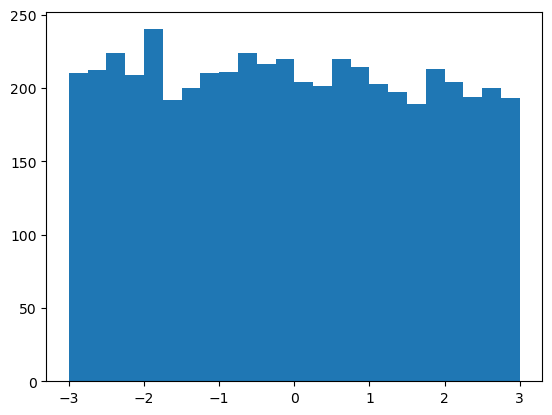

In [15]:
# Plot a histogram of uniforms
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

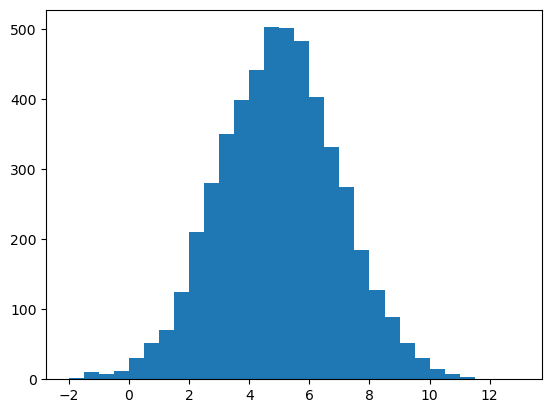

In [16]:
# Plot a histograms of normals
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

The histograms almost take the flat and bell curve shapes of the uniform and normal distributions,  
but there is a bit of random noise.

#### _Understanding random seeds_

Setting the seed for numpy's random number generator makes random number generation reproducible.

In [17]:
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)

print("x:", x)
print("y:", y)

x: [-1.0856  0.9973  0.283  -1.5063 -0.5786]
y: [ 1.6514 -2.4267 -0.4289  1.2659 -0.8667]


In [18]:
np.random.seed(123)
x = np.random.normal(size=5)

np.random.seed(123)
y = np.random.normal(size=5)

print("x:", x)
print("y:", y)

x: [-1.0856  0.9973  0.283  -1.5063 -0.5786]
y: [-1.0856  0.9973  0.283  -1.5063 -0.5786]


In [19]:
np.random.seed(123)
x = np.random.normal(size=5)

np.random.seed(456)
y = np.random.normal(size=5)

print("x:", x)
print("y:", y)

x: [-1.0856  0.9973  0.283  -1.5063 -0.5786]
y: [-0.6681 -0.4982  0.6186  0.5687  1.3505]


## 2. Sampling Methods

A brief explanation of the four random sampling methods in Python:

1. **Simple Random Sampling**:

   - **Definition**: Every individual in the population has an equal chance of being selected.

   - **Example**: Selecting 10 random samples from a dataset of 100 individuals.

2. **Systematic Sampling**:

   - **Definition**: Individuals are selected at regular intervals from an ordered list.

   - **Example**: Selecting every 10th individual from a list of 100.

3. **Stratified Sampling**:

   - **Definition**: The population is divided into subgroups (strata) based on certain characteristics,   
   and random samples are taken from each stratum.

   - **Example**: Dividing a dataset into male and female groups and then randomly selecting an equal   
   number of samples from each group.

4. **Cluster Sampling**:

   - **Definition**: The population is divided into clusters, and a random selection of clusters is chosen.  
   All individuals within the selected clusters are included in the sample.
   
   - **Example**: Dividing a dataset into different geographic regions and randomly selecting a few regions  
   to include all individuals from those regions in the sample.

In [20]:
''' The dataset used in this chapter, "attrition_pop", is a synthetic (fictional) employee dataset  
from IBM. '''

attrition_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int32   
 1   Attrition                 1470 non-null   float64 
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int32   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int32   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int32   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   int32   
 13  JobRole                   1470 non-null   catego

### Simple random and systematic sampling

#### _Simple random sampling_

In [21]:
# Sample 70 rows from "attrition_pop" using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


#### _Systematic sampling_

In [22]:
''' Systematically sample "attrition_pop" to get the rows of the population at each interval, starting  
at zero. '''

# Set the sample size
sample_size = 70

# Calculate the population size from "attrition_pop"
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

attrition_sys_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


#### _Is systematic sampling OK?_

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning  
behind the row order, then the resulting sample may not be representative of the whole population.  

The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random   
sampling.

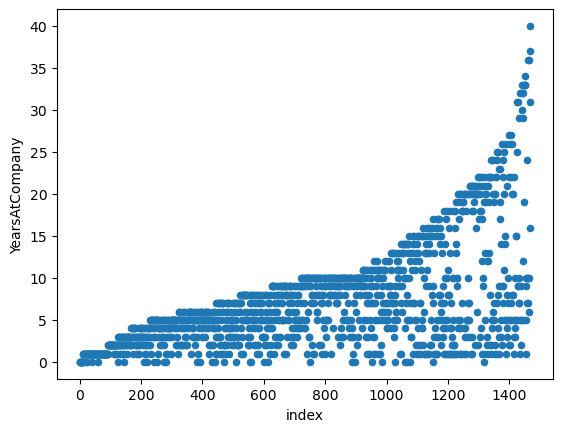

In [23]:
# Add an index column to "attrition_pop"
attrition_pop_id = attrition_pop.reset_index()

# Plot "YearsAtCompany" vs. index
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

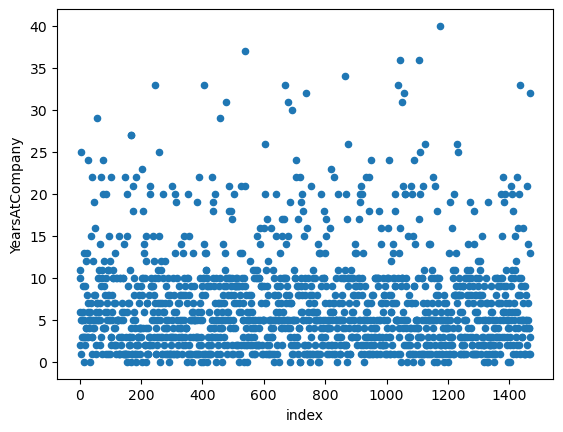

In [24]:
# Randomly shuffle the rows of "attrition_pop"
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and add an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot "YearsAtCompany" vs. "index" for "attrition_shuffled"
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### Stratified and weighted random sampling

#### _Proportional stratified sampling_

Proportional stratified sampling results in subgroup sizes within the sample that are representative of the
  
subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [25]:
# Get the proportion of employees by "Education" level from "attrition_pop"
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

education_counts_pop

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64

In [26]:
# Use proportional stratified sampling to sample 40% of each "Education" group
attrition_strat = attrition_pop.groupby("Education", observed=True)\
    .sample(frac=0.4, random_state=2022)

# Get the proportion of employees by "Education" level
education_counts_strat = attrition_strat["Education"]\
    .value_counts(normalize=True)

education_counts_strat

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64

By grouping then sampling, the size of each group in the sample is representative of the size of the  
sample in the population.

#### _Equal counts stratified sampling_

If one subgroup is larger than another subgroup in the population, but you want each subgroup to have equal  

weight in your analysis, then you can use equal counts stratified sampling to generate samples where each  

subgroup has the same amount of data.

In [27]:
# Get 30 employees from each "Education" group in "attrition_pop"
attrition_eq = attrition_pop.groupby("Education", observed=True)\
    .sample(n=30, random_state=2022)

# Get the proportions from "attrition_eq"
education_counts_eq = attrition_eq["Education"]\
    .value_counts(normalize=True)

education_counts_eq

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64

#### _Weighted sampling_

Weighted sampling lets you specify rules about the probability of picking rows at the row level. The  

probability of picking any given row is proportional to the weight value for that row.

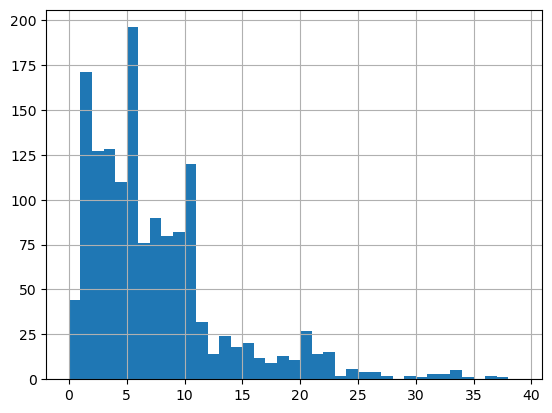

In [28]:
# Plot "YearsAtCompany" from "attrition_pop" as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0, 40, 1))
plt.show()

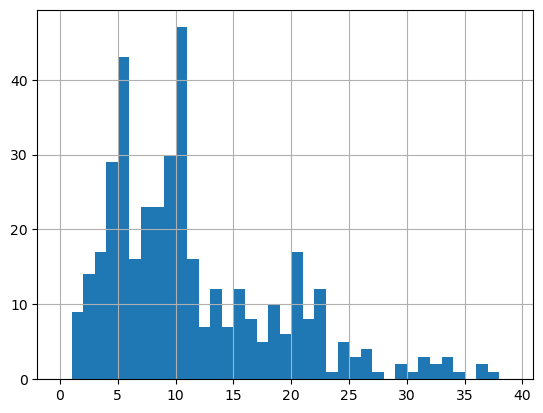

In [29]:
# Sample 400 employees weighted by "YearsAtCompany"
attrition_weight = attrition_pop.sample(
    n=400, weights="YearsAtCompany"
)

# Plot "YearsAtCompany" from "attrition_weight" as a histogram
attrition_weight["YearsAtCompany"].hist(bins=np.arange(0, 40, 1))
plt.show()

The weighted sample mean is around `11`, which is higher than the population mean of around `7`. The fact 
 
that the means are different shows that the weighted simple random sample is biased.

### Cluster sampling

`Cluster sampling` is a two-stage sampling technique that is closely related to stratified sampling. 

First, you randomly sample which subgroups to include in the sample, then randomly sample rows within  
each subgroup.

#### _Performing cluster sampling_

In [30]:
# Create a list of unique "JobRole" values from "attrition_pop"
job_roles_pop = list(attrition_pop["JobRole"].unique())

# Randomly sample four "JobRole" values

import random
random.seed(19790801)

job_roles_samp = random.sample(job_roles_pop, k=4)

print(job_roles_samp)

['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']


In [31]:
# Subset "attrition_pop" by filtering for the sampled job roles
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)

attrition_filtered = attrition_pop[jobrole_condition]

attrition_filtered["JobRole"].value_counts()

JobRole
Research_Scientist           292
Manager                      102
Research_Director             80
Human_Resources               52
Healthcare_Representative      0
Laboratory_Technician          0
Manufacturing_Director         0
Sales_Executive                0
Sales_Representative           0
Name: count, dtype: int64

In [32]:
# Remove any unused categories from "JobRole"
attrition_filtered.loc[:, "JobRole"] = attrition_filtered.loc[:, "JobRole"]\
    .cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole", observed=True)\
    .sample(n=10, random_state=2022)

attrition_clust["JobRole"].value_counts()

C:\Users\mrlbh\AppData\Local\Temp\ipykernel_19472\3067477590.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Research_Scientist', 'Research_Scientist', 'Research_Scientist', 'Research_Scientist', 'Research_Scientist', ..., 'Manager', 'Manager', 'Manager', 'Manager', 'Research_Director']
Length: 526
Categories (4, object): ['Human_Resources', 'Manager', 'Research_Director', 'Research_Scientist']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  attrition_filtered.loc[:, "JobRole"] = attrition_filtered.loc[:, "JobRole"]\


JobRole
Human_Resources       10
Manager               10
Research_Director     10
Research_Scientist    10
Name: count, dtype: int64

#### _3 kinds of sampling_

The `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's  
relationship with the company has four levels: `Low`, `Medium`, `High`, and `Very_High`.

In [33]:
# Perform simple random sampling to get 0.25 of the population.
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [34]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction", observed=True)\
    .sample(frac=0.25, random_state=2022)

In [35]:
# Create a list of unique "RelationshipSatisfaction" values
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample 2 unique satisfaction values

import random
random.seed(19790801)

satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for "satisfaction_samp" and clear unused categories from
# "RelationshipSatisfaction"

satisfaction_cond = attrition_pop["RelationshipSatisfaction"]\
    .isin(satisfaction_samp)

attrition_cluster_prep = attrition_pop[satisfaction_cond]

attrition_cluster_prep["RelationshipSatisfaction"] = attrition_cluster_prep\
    ["RelationshipSatisfaction"].cat.remove_unused_categories()

# Perform cluster sampling on the selected satisfaction groups
attrition_clust = attrition_cluster_prep.groupby("RelationshipSatisfaction", observed=True)\
    .sample(frac=0.25, random_state=2022)


C:\Users\mrlbh\AppData\Local\Temp\ipykernel_19472\1728968354.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_cluster_prep["RelationshipSatisfaction"] = attrition_cluster_prep\


#### _Comparing point estimates_

How does satisfaction with the company affects whether or not the employee leaves the company.  

Calculate the proportion of employees who left the company (they have an `Attrition` value of `1`)  

for each value of `RelationshipSatisfaction`. Using the three types of sample (simple, stratified, and 

cluster), compare point estimates from each sample to the population parameter.

In [36]:
# Mean "Attrition" by "RelationshiSatisfaction" group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction", observed=True)\
    ["Attrition"].mean()

print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [37]:
# Mean "Attrition" for the simple random sample
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction", observed=True)\
    ["Attrition"].mean()

print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [38]:
# Mean "Attrition" for the stratified sample
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction", observed=True)\
    ["Attrition"].mean()

print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [39]:
# Mean "Attrition" for the cluster sample
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction", observed=True)\
    ["Attrition"].mean()

print(mean_attrition_clust)

RelationshipSatisfaction
Medium       0.105263
Very_High    0.101852
Name: Attrition, dtype: float64


## 3. Sampling Distributions

### Relative error of point estimates

**Relative Errors of Point Estimates**:
   - Relative error measures the accuracy of a point estimate (e.g., a sample mean) by comparing the  
   difference between the estimate and the true population parameter to the true parameter itself. It is  
   expressed as a percentage, helping to assess how close the estimate is to the actual value.

#### _Calculating relative errors_

In [40]:
''' The size of the sample affects how accurately the point estimates reflect the corresponding  
population parameter. The most common metric for assessing accuracy is relative error. '''

# Generate a simple random sample of 50 rows
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(attrition_pop["Attrition"].mean() - 
                            mean_attrition_srs50) / attrition_pop["Attrition"].mean()

print(rel_error_pct50)

62.78481012658227


In [41]:
# Generate a simple random sample of 100 rows
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(attrition_pop["Attrition"].mean() - 
                             mean_attrition_srs100) / attrition_pop["Attrition"].mean()

print(rel_error_pct100)

6.962025316455695


As the sample size increases, the sample mean generally gets closer to the population mean,  
and the relative errror decreases.

### Creating a sampling distribution

**Creating a Sampling Distribution**:
   - A sampling distribution is generated by taking multiple samples from a population and calculating a  
   statistic (e.g., the mean) for each sample. Plotting these statistics gives the sampling distribution,  
   which shows how the statistic varies across different samples and helps in understanding the variability  
   of the estimate.

#### _Replicating samples_

In [42]:
''' Generate multiple samples from "attrition_pop" and calculate the mean "Attrition". '''

# Create 500 sample means
mean_attritions = []

for i in range(500):
    mean_attritions.append(
        attrition_pop.sample(n=60)["Attrition"].mean()
    )

# Preview the list
print(mean_attritions[0:5])


[0.16666666666666666, 0.18333333333333332, 0.1, 0.15, 0.18333333333333332]


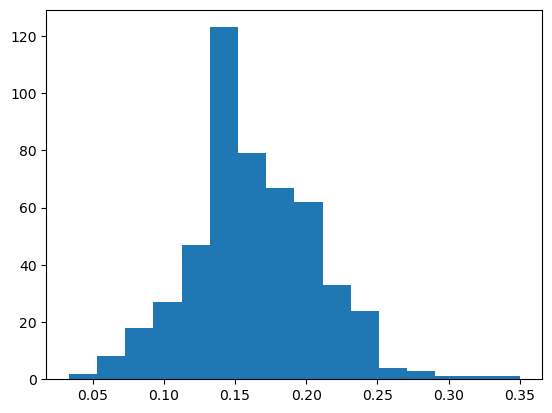

In [43]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

### Approximate sampling distributions

**Approximate Sampling Distributions**:
   - Approximate sampling distributions refer to the estimation of the sampling distribution using  
   mathematical methods, such as bootstrapping, or by assuming certain conditions like normality.  
   These approximations are often used when the exact sampling distribution is difficult to obtain.

#### _Exact sampling distribution_

The distribution of a sample statistic is called the `sampling distribution`. When we can calculate this  
exactly, rather than using an approximation, it is known as the `exact sampling distribution`.

In [44]:
''' Create a DataFrame with five columns named die1 to die5. The rows should contain all possibilities  
for throwing five 8-sided dice, each numbered 1 to 8. '''

from itertools import product

# Generate all combinations of the dice rolls
dice_combinations = list(product([1,2,3,4,5,6,7,8], repeat=5))

# Create a DataFrame from the combinations
dice = pd.DataFrame(dice_combinations, columns=["die1", "die2", "die3", "die4", "die5"])

print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [45]:
''' Add a categorical column, "mean_roll", that contains the mean of the five rolls. '''

dice["mean_roll"] = (
    dice["die1"] + dice["die2"] + dice["die3"] +
    dice["die4"] + dice["die5"]
) / 5

dice["mean_roll"] = dice["mean_roll"].astype("category")

print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


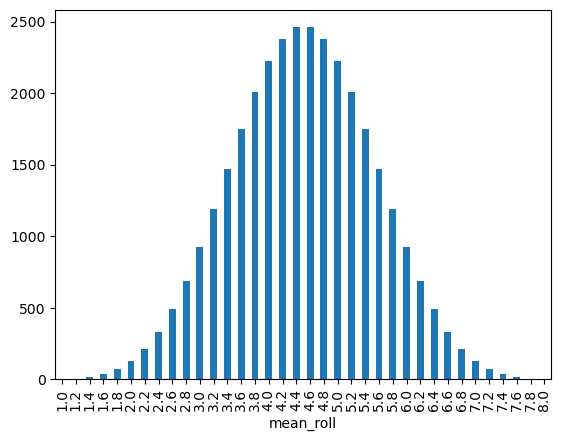

In [46]:
''' Create a bar plot of the "mean_roll" categorical column. '''

dice["mean_roll"].value_counts(sort=False).plot(kind="bar")
plt.show()

The exact sampling distribution shows all possible variations of the point estimate that you  
are interested in.

#### _Generating an approximate sampling distribution_

Calculating the exact sampling distribution is only possible in very simple situations.  

When the dataset is more complicated, for example, where a variable has hundreds or thousands  

of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, an `approximate sampling distribution`, calculated by simulating the  

`exact sampling distribution`, must be used.

In [47]:
# Sample the numbers one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

5.0


In [48]:
# Replicate the sampling code 1_000 times
sample_means_1000 = []

for i in range(1_000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Preview the result
print(sample_means_1000[0:5])

[6.0, 3.2, 4.4, 4.0, 4.4]


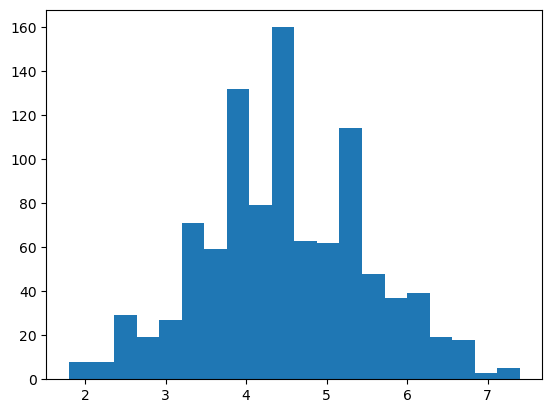

In [49]:
# Plot a histogram of sample_means_1000
plt.hist(sample_means_1000, bins=20)
plt.show()

### Standard errors and the Central Limit Theorem

**Standard Errors and the Central Limit Theorem (CLT)**:
   - The standard error is the standard deviation of the sampling distribution, reflecting the variability  
   of a statistic across samples. The Central Limit Theorem states that, regardless of the population  
   distribution, the sampling distribution of the sample mean will approach a normal distribution as the  
   sample size increases, making it easier to make inferences about the population.

#### _Population & sampling distribution means_

Explore the relationship between the mean of the sampling distribution and the population parameter's mean.  

Calculate three sampling distributions. For each, sample the employee attrition dataset using simple  
random sampling, then calculate the mean attrition.

In [50]:
# Sampling distribution using sample size of 5, replicated 1_000 times
sampling_distribution_5 = []

for i in range(1_000):
    sampling_distribution_5.append(
        attrition_pop.sample(n=5)["Attrition"].mean()
    )

# Sampling distribution using sample size of 50, replicated 1_000 times
sampling_distribution_50 = []

for i in range(1_000):
    sampling_distribution_50.append(
        attrition_pop.sample(n=50)["Attrition"].mean()
    )

# Sampling distribution using sample size of 500, replicated 1_000 times
sampling_distribution_500 = []

for i in range(1_000):
    sampling_distribution_500.append(
        attrition_pop.sample(n=500)["Attrition"].mean()
    )

In [51]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)

mean_of_means_50 = np.mean(sampling_distribution_50)

mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print("mean_of_means_5:  ", mean_of_means_5)
print("mean_of_means_50: ", mean_of_means_50)
print("mean_of_means_500:", mean_of_means_500)

mean_of_means_5:   0.16920000000000002
mean_of_means_50:  0.16358
mean_of_means_500: 0.16074399999999997


**Question:** How does the sample size affect the mean of the sample means?

* Regardless of sample size, the mean of the sampling distribution is a close  
approximation to the population mean.

#### _Population & sampling distribution variation_

Now, explore the relationship between the standard deviation of the sampling distribution, and the  
population parameter's standard deviation and the sample size.

In [52]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)

sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)

sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print("sd_of_means_5:  ", sd_of_means_5)
print("sd_of_means_50: ", sd_of_means_50)
print("sd_of_means_500:", sd_of_means_500)

sd_of_means_5:   0.16864103830266164
sd_of_means_50:  0.05141816242756471
sd_of_means_500: 0.013580238837623103


**Question:** How are the standard deviations of the sampling distributions related to the population  
standard deviation and the sample size?

* The standard deviation of the sampling distribution, often called the **standard error**, is approximately  
equal to the population standard deviation divided by the square root of the sample size.

* The standard error gives us an idea of how much the sample mean (or other sample statistic) is expected  
to vary from the true population mean.

### Bootstrap Distributions

**1. Introduction to Bootstrapping**  
Bootstrapping is a statistical method that involves resampling a dataset with replacement to estimate the distribution of a statistic (e.g., mean, median) in an unknown population. By repeatedly drawing samples from the data and calculating the statistic for each sample, bootstrapping allows us to approximate the sampling distribution of the statistic without requiring assumptions about the population's distribution.

**2. Comparing Sampling and Bootstrap Distributions**  
- **Sampling Distributions** are theoretical distributions of a statistic (like the mean) obtained by drawing all possible samples of a specific size from a population. In practice, obtaining a true sampling distribution is often infeasible due to the need for access to the entire population.
- **Bootstrap Distributions**, on the other hand, are empirical distributions obtained by resampling the observed data (with replacement) many times. This allows us to estimate the sampling distribution of a statistic using only the available data, providing insight into the variation and uncertainty of the statistic.

**3. Confidence Intervals**  
Using the bootstrap distribution, confidence intervals can be constructed to estimate the range within which the true population parameter is likely to lie. Common methods include the percentile method (taking the central range of the bootstrap distribution) and the bias-corrected and accelerated (BCa) method, which adjusts for bias and skewness in the bootstrap distribution. Bootstrapped confidence intervals are useful when traditional parametric methods are not applicable, such as when the underlying population distribution is unknown or complex.

These concepts allow analysts to assess the reliability of statistical estimates and make informed inferences about population parameters using limited data.

### Introduction to bootstrapping

Bootstrapping is a statistical method that involves resampling a dataset with replacement to estimate the  
distribution of a statistic (e.g., mean, median) in an unknown population. By repeatedly drawing samples  
from the data and calculating the statistic for each sample, bootstrapping allows us to approximate the  
sampling distribution of the statistic without requiring assumptions about the population's distribution.

#### _Principles of bootstrapping_

* Bootstrap resamples should be the same size as the original sample.

* Each row in the dataset should have an equally likely chance of   
being drawn in a resample.

* A bootstrap distribution consists of many replicates of the  
statistic of interest.

#### _With or without replacement_

The key to deciding whether to sample without or with replacement is whether  
or not your dataset is best thought of as being the whole population or not.

#### _Generating a bootstrap distribution_

To see how resampling works, create `spotify_sample`, a subset of the `spotify_population` dataset. Add a  

row index column called `index`, and include only the `artist name`, `song name`, and `danceability`.

In [53]:
# Create spotify_sample
spotify_sample = spotify_population[["artists", "name", "danceability"]]

spotify_sample = spotify_sample.reset_index()

# Preview dataset
spotify_sample.head()

,index,artists,name,danceability
0,0,['David Bauer'],Shout to the Lord,0.567
1,1,['Etta James'],Miss You,0.821
2,2,['Quasimoto'],Real Eyes,0.706
3,3,['Millencolin'],Penguins & Polarbears,0.368
4,4,['Steve Chou'],黃昏,0.501


In [54]:
# Generate a single bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

print(spotify_1_resample.shape)

(41656, 4)


In [55]:
# Calculate the mean of the "danceability" column
mean_danceability = np.mean(spotify_1_resample["danceability"])

print(mean_danceability)

0.5912981707317073


In [56]:
# Replicate the calculation of the mean 1_000 times
mean_danceability_1000 = []

for i in range(1_000):
    mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)["danceability"])
    )

print(mean_danceability_1000[0:5])

[0.5908919195314001, 0.5910363285000961, 0.5911114413289802, 0.5900902511042826, 0.5926340575187249]


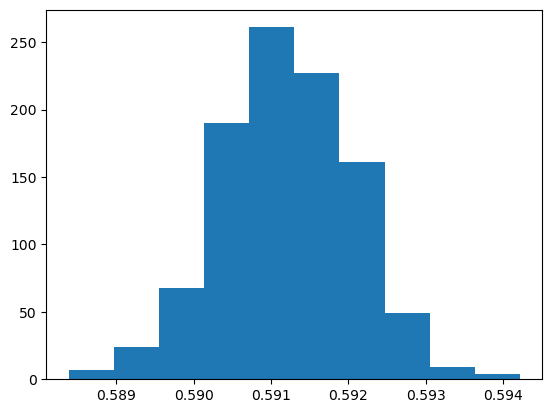

In [57]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

### Comparing sampling and bootstrap distributions

**Sampling Distributions** are theoretical distributions of a statistic (like the mean) obtained by drawing  
all possible samples of a specific size from a population. In practice, obtaining a true sampling  
distribution is often infeasible due to the need for access to the entire population.

**Bootstrap Distributions**, on the other hand, are empirical distributions obtained by resampling the  
observed data (with replacement) many times. This allows us to estimate the sampling distribution of a  
statistic using only the available data, providing insight into the variation and uncertainty of the statistic.

#### _Bootstrap statistics and population statistics_

**Question:** Bootstrap distribution statistics can be used to estimate population parameters. But can you  
always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the  
corresponding values of the population?

* No, if the sample is not closely representative of the population, then the mean of the bootstrap   
distribution will not be representative of the population mean. This is less of a problem for standard errors.

#### _Sampling distribution vs. bootstrap distribution_

The sampling distribution and bootstrap distribution are closely linked. In the rare situations where you  
can repeatedly sample from a population, it's helpful to generate both the sampling distribution and the  
bootstrap distribution, to see how they are related.

In [58]:
''' Sample 5_000 rows of the population without replacement, 2_000 times,
and calculate the mean popularity score of songs. '''

mean_popularity_2000_samp = []

for i in range(2_000):
    mean_popularity_2000_samp.append(
        np.mean(spotify_population.sample(n=5_000)["popularity"])
    )

# Preview the results
mean_popularity_2000_samp[0:5]

[54.9762, 54.8984, 54.617, 54.7038, 54.8122]

In [64]:
# Create a sample of 5_000 randomly sampled rows from "spotify_population"
spotify_sample = spotify_population.sample(n=5_000)

''' Sample 5_000 rows of the sample with replacement, 2_000 times,
and calculate the mean popularity score of songs. '''

mean_popularity_2000_boot = []

for i in range(2_000):
    mean_popularity_2000_boot.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)["popularity"])
    )

# Preview the results
mean_popularity_2000_boot[0:5]

[54.7352, 54.7198, 54.7458, 54.4972, 54.4822]

The sampling distribution and bootstrap distribution are closely related,  
and so is the code to generate them.

#### _Comparing sampling and bootstrap means_

In [65]:
''' Calculate the mean popularity in four ways. '''

# Calculate the population mean popularity
pop_mean = spotify_population["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

print("pop_mean:       ", pop_mean)
print("samp_mean:      ", samp_mean)
print("samp_distn_mean:", samp_distn_mean)
print("boot_distn_mean:", boot_distn_mean)

pop_mean:        54.837142308430955
samp_mean:       54.6538
samp_distn_mean: 54.8380403
boot_distn_mean: 54.6560711


The sampling distribution mean can be used to estimate the population mean, but that is not the case with  
the bootstrap distribution.

#### _Compare sampling and bootstrap standard deviations_

In [67]:
''' Calculate the standard deviation of popularity in four ways. '''

# Calculate the population std dev of popularity
pop_sd = spotify_population["popularity"].std(ddof=0)

# Calculate the original sample std dev of popularity
samp_sd = spotify_sample["popularity"].std()

# Calculate the sampling dist'n estimate of std dev of popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev of popularity
boot_distn_std = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(5000)

print("pop_sd:        ", pop_sd)
print("samp_sd:       ", samp_sd)
print("samp_distn_sd: ", samp_distn_sd)
print("boot_distn_std:", boot_distn_std)

pop_sd:         10.880065274257204
samp_sd:        10.888730800772208
samp_distn_sd:  10.067699025168595
boot_distn_std: 10.764986107138897


The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

When you don't have all the values from the population or the ability to sample multiple times, you can use  

bootstrapping to get a good estimate of the population standard deviation.

### Confidence intervals

Using the bootstrap distribution, confidence intervals can be constructed to estimate the range within which  
the true population parameter is likely to lie. 

Common methods include the percentile method (taking the central range of the bootstrap distribution) and the  
bias-corrected and accelerated (BCa) method, which adjusts for bias and skewness in the bootstrap distribution. 

Bootstrapped confidence intervals are useful when traditional parametric methods are not applicable, such as  
when the underlying population distribution is unknown or complex.

#### _Confidence interval interpretation_

**Question:** When reporting results, it is common to provide a confidence interval alongside an estimate.  
What information does that confidence interval provide?

* Confidence intervals account for uncertainty in our estimate of a population parameter by providing a  
range of possible values. We are confident that the true value lies somewhere in the interval specified by  
that range.

#### _Calculating confidence intervals_

In [68]:
''' Generate a 95% confidence interval using the quantile method on the bootstrap distribution,  
setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant. '''

lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)

upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)

print(f"lower_quant: {lower_quant}, upper_quant: {upper_quant}")

lower_quant: 54.359785, upper_quant: 54.941005000000004


In [69]:
''' Generate a 95% confidence interval using the standard error method from the bootstrap distribution '''

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)

standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# Find the lower and upper limits of the confidence interval
from scipy.stats import norm

lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print(f"lower_se: {lower_se}, upper_se: {upper_se}")

lower_se: 54.3576863917009, upper_se: 54.954455808299095


The standard error method for calculating the confidence interval assumes  
that the bootstrap distribution is normal.

This assumption should hold if the sample size and the number of replicates  
are sufficiently large.

<div style="text-align: center; font-size: 18px; font-weight: bold; color: #F5DEB3;">
<span>[ End of notebook ]</span>
</div>